Date
2015-01-01          0.00
2015-02-01    5500056.18
2015-03-01    2200000.00
2015-04-01          0.00
2015-05-01    3231000.00
Name: Withdrawl_Amount, dtype: float64


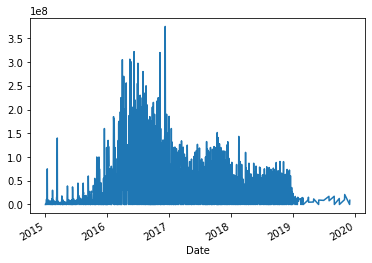

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as pyplot
#series = pd.read_csv(r'time_series_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series = pd.read_csv('time_series_data.csv',header=0, index_col=0, squeeze=True,parse_dates=[0])
print(series.head())
series.plot()
pyplot.show()

In [14]:
import numpy as np
 
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(series)

ValueError: Expected 2D array, got 1D array instead:
array=[       0.    5500056.18  2200000.   ...        0.    4800000.
 11694712.08].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
series

In [ ]:
series.dtypes

In [ ]:
 #series['Withdrawl_Amount']=(series['Withdrawl_Amount']).astype('str')

In [ ]:
from pandas.plotting import autocorrelation_plot
#series['Withdrawl_Amount']=(series['Withdrawl_Amount']).astype('str')
#series['Withdrawl_Amount']=(series['Withdrawl_Amount']).astype('float64')
autocorrelation_plot((series))
pyplot.show()

In [ ]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(series, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
from sklearn.metrics import mean_squared_error
 
X = series.values
print(X)
size = int(len(X) * 0.66)
print(size)
train, test = X[0:size], X[size:len(X)]
print('m train', train)
print()
print('m test',test)
history = [x for x in train]
print(history)
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
     
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
print(model_fit.summary())

In [ ]:
#root mean squared eroor
import math
rmse_test=math.sqrt(error)

In [ ]:
rmse_test